## Multiple frameworks

Call multiple deep learning frameworks (cellpose cyto3, cellposesam, microsam, and mobilesam) in the same notebook


In [2]:
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [3]:

image_path = r"D:\images\tnia-python-images\imagesc\2024_03_27_SOTA_segmentation\images\cell_00081.bmp"
label_path = r"D:\images\tnia-python-images\imagesc\2024_03_27_SOTA_segmentation\labels\cell_00081_label.tiff"


cell_00081
Loaded image shape: (1920, 2560, 3), dtype: uint8


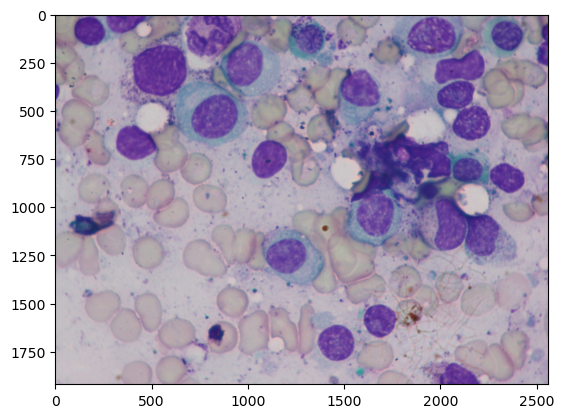

In [4]:

image_name = os.path.basename(image_path)
image_name = os.path.splitext(image_name)[0]
print(image_name)

img = io.imread(image_path)

if (len(img.shape) == 2):
    img = np.expand_dims(img, axis=2)  # Add channel dimension if it's grayscale
    # repeat channels so there is 3
    img = np.repeat(img, 3, axis=2)

roi = np.s_[256:1024, 256:1024, ...]  # Define the region of interest (ROI)
roi = np.s_[...]
img = img[roi]  # Crop the image to the ROI

# Print image information
print(f"Loaded image shape: {img.shape}, dtype: {img.dtype}")

plt.imshow(img)

Cellpose version: 4.0.1 (major number: 4)


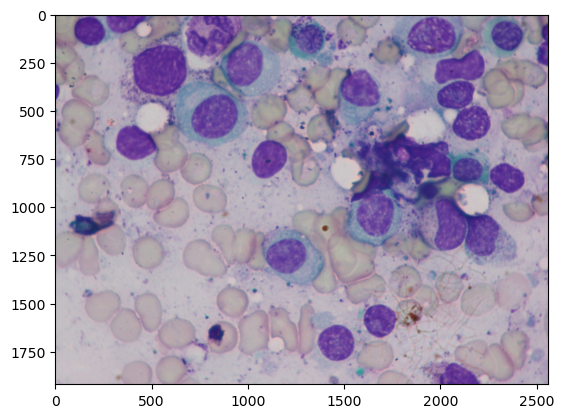

In [7]:
import cellpose
from cellpose import models, io

plt.imshow(img)

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto2')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)


In [9]:
print(img.shape)
result = model.eval(img, niter=2000)

(1920, 2560, 3)


In [10]:
from tnia.plotting.plt_helper import random_label_cmap, mask_overlay

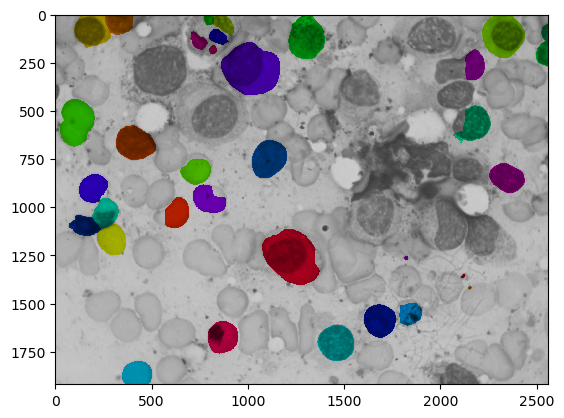

In [12]:
test = mask_overlay(img, result[0])
plt.imshow(test)#, cmap=random_label_cmap())